<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
server_path = '/datasets/real_estate_data.csv'
filename = 'real_estate_data.csv'
try:
    data = pd.read_csv(server_path, sep='\t')
except: 
    data = pd.read_csv(filename)
print(data.info())
display(data.head(15))
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Не во всех объявлениях указана жилая площадь, площадь кухни, высота потолков в квартире, наличие балкона, количество этажей в доме, название района,  расстояние до центра, аэропортов, парков, водоемов. 

Не во всех объявлениях указан населенный пункт.

В части данных, заполняемых атоматически (расстояние до центра, аэропортов, парков, водоемов) необходимо передать информацию разработчикам.

Странно, что формат значений в графе is_apartment не является булевым, как сказано в описании, хотя в графах studio и open_plan тип соответствует описанию.

## Предобработка данных

In [2]:
data.duplicated().sum()# дубликатов нет
print(data['cityCenters_nearest'].max)

<bound method Series.max of 0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64>


In [3]:
data['balcony'] = data['balcony'].fillna(0) #если собственник не указал наличие балкона, считаю, что его нет, меняю значение на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0) #если нет сведений о парках в радиусе 3 километров,
#считаю, что парков нет, заменяю значение на 0, также меняю на 0 соответствующее значение в графе parks_nearest
#аналогично для водоемов
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
#data['airports_nearest'] = data['airports_nearest'].fillna(0)


In [4]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['kitchen_area'] = data['total_area'] - data['living_area']

data = data.dropna(subset = ['locality_name']) #удаляю строки с пропущенными названиями населенных пунктов (их всего 49)

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))

data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean')) 

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(99999)
data['airports_nearest'] = data['airports_nearest'].fillna(99999)

data['rooms'].value_counts() # у 197 объявлений количество квартир равно 0, и это не все студии
data['studio'].value_counts() # при этом студий всего 149
data[data['studio'] == 1]['rooms'].unique()
data[data['studio'] == 1]['rooms'].sum() # из них у 11 студий указано по 1 комнате

data['days_exposition'] = data['days_exposition'].fillna(99999)
data['floors_total'] = data['floors_total'].fillna(99999)

#print(data.info())

In [5]:
#Замена типа данных на целочисленный
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['last_price'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [6]:
#print(data['ceiling_height'].unique()) #есть объявления с указанной высотой потолков более 20 метров, считаю, что это ошибка при заведении
#исправляю путем переноса запятой
def ceiling(height):
    if  height >= 20.0:
        height = height / 10
    return height
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y%m%dT%H:%M:%S').dt.round('1D')
 #перевела графу first_day_exposition в формат даты с округлением до одного дня
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23507 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23507 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000     

Формат графы с датами размещения объявления перевела в формат даты с округлением до одного дня.

In [8]:
print(data['locality_name'].value_counts())


Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Большая Пустомержа        1
посёлок Высокоключевой            1
деревня Щеглово                   1
деревня Большое Рейзино           1
деревня Меньково                  1
Name: locality_name, Length: 364, dtype: int64


In [9]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('платформа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '', regex=True)
print(data['locality_name'].value_counts())

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
                   ...  
алексеевка             1
кирпичное              1
хязельки               1
пчева                  1
мыза-ивановка          1
Name: locality_name, Length: 309, dtype: int64


### Вывод

Заменила на 0 отсутствующие данные о балконах (считаю, что если собственник не указал наличие балкона, то его нет).

Также считаю, что если нет сведений о парках в радиусе 3 километров, считаю, что парков нет, заменяю значение на 0, также меняю соответствующее значение в графе parks_nearest. Аналогично меняю значения для водоемов.

Отсутствующую информацию по жилой площади заменила на медиану для квартир с такой же общей площадью, отсутствующие данные по площади кухни заменила на разность общей и жилой площади (незаполненными осталось менее 1% объявлений, считаю, что это несущественно).

Там, где возможно заполнила расстояние до центра и до аэропорта средним расстоянием для данного населенного пункта, там где среднее расстояние для данного населенного пункта не вычисляется заполнила маркером (99999).

Также маркерами заменила пропуске в графе days_exposition, считаю, что недвижимость еще не продана и объявление не снято, и графе floors_total.

Поскольку количество объявлений с 0 комнат менее 1%,в дальнейшем буду считать это выбросами (тем более, что не понимаю, студия считается за комнату или нет).

Тип данных в части полученных автоматически (количество парков, водоемов, а также расстояние до них, до центра, до аэропорта) заменила на целочисленный, для удобства расчетов.
Количество балконов и цену квартиры также заменила на целочисленный для удобства расчетов.

Считаю, что данные о метраже квартир (общая жилая площадь, площадь кухни, высота потолков) приводить к целочисленным значениям некорректно.

В объявлениях с указанной высотой потолков более 20 метров считаю, что собственник ошибся при заведении и перенесла запятую на один знак влево.

Перевела графу first_day_exposition в формат даты с округлением до одного дня.

## Расчёты и добавление результатов в таблицу

In [10]:
weekday1 = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.map(weekday1) #получила день недели размещения объявления
data['month_exposition'] = data['first_day_exposition'].dt.month #получила месяц размещения объявления
data['year_exposition'] = data['first_day_exposition'].dt.year #получила год размещения объявления


In [11]:
data['price_per_meter'] = data['last_price'] / data['total_area'] #посчитала и добавила в таблицу цену за квадратный метр


In [12]:
def floor_number(row): #посчитпала и добавила в таблицу этаж квартиры, для тех объявлений, где не указано количество этажей считаю, что этаж не последний
    number = row['floor']
    floors_total = row['floors_total']
    if number == 1:
        return '1'
    if number == floors_total:
        return '3'
    else:
        return '2'
    
data['floor_number'] = data.apply(floor_number, axis = 1)
data['floor_number'] = pd.to_numeric(data['floor_number'])
data['floor_number'].value_counts()

2    17408
3     3330
1     2912
Name: floor_number, dtype: int64

In [13]:
data['locality_name']

0        санкт-петербург
1                 шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695              тосно
23696        рождествено
23697    санкт-петербург
23698        новый учхоз
Name: locality_name, Length: 23650, dtype: object

In [14]:
data['living_area_rate'] = data['living_area'] / data['total_area']
data['kitchen_area_rate'] = data['kitchen_area'] / data['total_area']
display(data.head(15)) #посчитала и добавила в таблицу отношение жилой площади к общей и площади кухни к общей
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,price_per_meter,floor_number,living_area_rate,kitchen_area_rate
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2,755,99999,4,3,2019,120370.370370,2,0.472222,0.527778
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,0,0,81,2,12,2018,82920.792079,1,0.460396,0.539604
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,2,574,558,4,8,2015,92785.714286,2,0.612500,0.387500
3,0,64900000,159.00,2015-07-24,3,NaN,14,95.00,9,True,...,3,234,424,5,7,2015,408176.100629,2,0.597484,0.402516
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1,48,121,2,6,2018,100000.000000,2,0.320000,0.680000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,0,0,55,1,9,2018,95065.789474,2,0.473684,0.526316
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,0,0,155,4,11,2017,99195.710456,2,0.284182,0.715818
7,5,7915000,71.60,2019-04-18,2,NaN,24,44.30,22,True,...,0,0,99999,4,4,2019,110544.692737,2,0.618715,0.381285
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,0,0,189,3,5,2018,87454.764777,2,0.465320,0.534680
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0,0,289,7,2,2017,88524.590164,2,0.714754,0.285246


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23507 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23507 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000     

### Вывод

В отдельные графы вывела день недели, месяц и год размещения объявления. День недели вывела числовыми значеними от 1 до 7 для удобства восприятия. Месяцы оставила числовыми значениями, так как они соответсвуют общепринятым обозначениям.

Посчитала и добавила в таблицу этаж квартиры используя следующие обозначения 1 - первый, 3 - последний, 2 - другой, для тех объявлений, где не указано количество этажей считаю, что этаж не последний.

Посчитала и добавила в таблицу цену за квадратный метр, отношение жилой площади к общей и площади кухни к общей площади.


## Исследовательский анализ данных

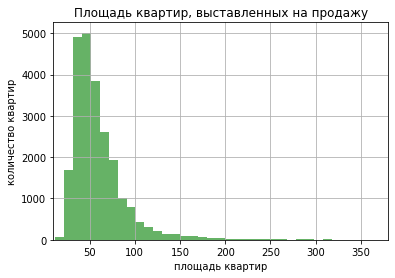

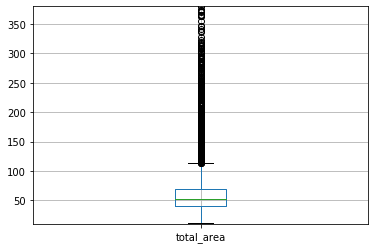

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
692


In [15]:
ax = plt.axes()
ax.set_title('Площадь квартир, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(data['total_area'], bins=90, color="green", alpha=0.6)
ax.set_xlim([10, 380]) 
plt.xlabel('площадь квартир')
plt.ylabel('количество квартир') 
plt.show()

plt.ylim(10, 380)
data.boxplot(column='total_area')
plt.show()
print(data['total_area'].describe()) 
print(data[data['total_area'] < 30]['total_area'].count())

Наибольшее количество квартир выставленных на продажу (пик гистограммы) - квартиры с площадью 30-40 квадратных метров, на них приходится почти половина всех продаваемых квартир. Скорее всего это однокомнатные квартиры и двухкомнатные квартиры  в советском жилом фонде.

Следующие по количеству - квартиры площадью 50-100 квадратных метров, скорее всего двух-трехкомнатные квартиры.

Медиана составляет 52 квадратных метра, средняя площадь - 60 квадратных метров.
Самая маленькая площадь в объявлении - 12 квадратных метров (скорее всего продается комната в квартире), самая большая - 900 квадратных метров.
Квартиры с площадью менее 30 квадратных метров и более 150 - выбросы. 
Квартиры с площадью более 150 метров уже находятся за пределами "усов", это нетиповые, штучные предложения на рынке.

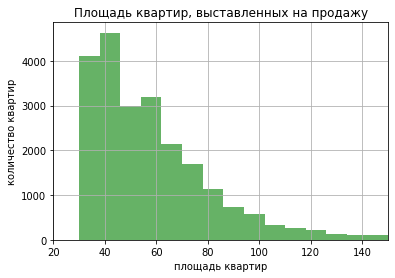

count    22396.000000
mean        57.470980
std         22.661107
min         30.000000
25%         41.000000
50%         52.000000
75%         68.200000
max        150.000000
Name: total_area, dtype: float64


In [16]:
total_area_clean = data.query('30 <= total_area <= 150')
ax = plt.axes()
ax.set_title('Площадь квартир, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(total_area_clean['total_area'], bins=15, color="green", alpha=0.6)
ax.set_xlim([20, 150]) 
plt.xlabel('площадь квартир')
plt.ylabel('количество квартир') 
plt.show()

print(total_area_clean['total_area'].describe()) 

После исключения слишком больших и слишком маленьких площадей медиана не изменилась (52 квадратных метра), среднее значение площади квартир (57 квадратных метров) приблизилось к медиане. 

Text(0.5, 1, 'Цена квартир, выставленных на продажу')

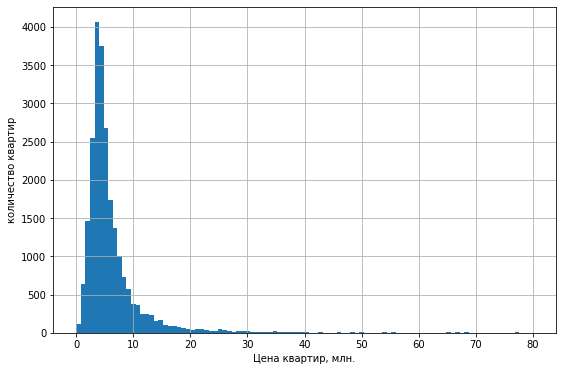

In [17]:
(data['last_price'] / 1000000).hist(bins=100, range=(0, 80), figsize=(9, 6))
plt.xlabel('Цена квартир, млн.')
plt.ylabel('количество квартир')
ax.set_title('Цена квартир, выставленных на продажу') 


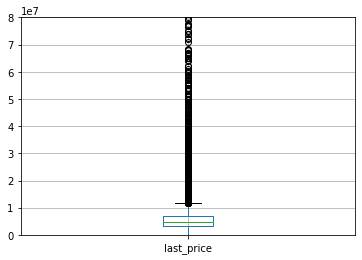

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64
972


In [18]:
plt.ylim(0, 80000000)
data.boxplot(column='last_price')
plt.show()
print((data['last_price']/1000000).describe()) 
print(data[data['last_price'] < 1750000]['last_price'].count()) 

Средняя цена квартиры составляет 6.5 миллионов, медианная - 4.65 миллиона. Квартиры стоимостью менее 1.5 и более 20 миллионов предлагаю отбрасывать, доля таких квартир невелика, это единичные, эксклюзивные предложения на рынке.

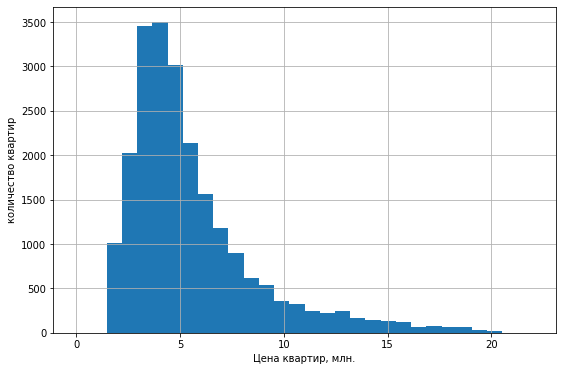

count    2.223700e+04
mean     5.544967e+06
std      3.153120e+06
min      1.510000e+06
25%      3.500000e+06
50%      4.630000e+06
75%      6.550000e+06
max      1.999900e+07
Name: last_price, dtype: float64


In [19]:
good_prices = data.query('1500000 < last_price < 20000000')

(good_prices['last_price'] / 1000000).hist(bins=30, range=(0, 22), figsize=(9, 6))
plt.xlabel('Цена квартир, млн.')
plt.ylabel('количество квартир')
ax.set_title('Цена квартир, выставленных на продажу') 

plt.show()
print(good_prices['last_price'].describe())

Исключение слишком больших и слишком маленьких цен практически не повлияло на медиану (стала 4.63 миллиона), средняя стоимость (5.54 миллиона) приблизилась к медиане, гистограмма приняла вид нормального распределения.

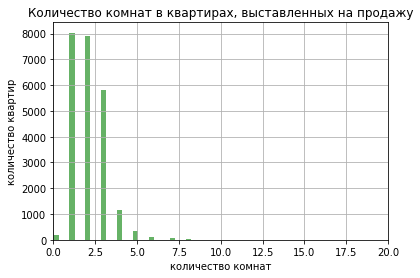

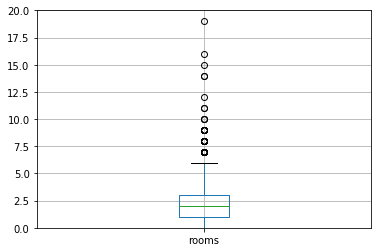

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [20]:
ax = plt.axes()
ax.set_title('Количество комнат в квартирах, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,10))
plt.hist(data['rooms'], bins=60, color="green", alpha=0.6)
ax.set_xlim([0, 20]) 
plt.xlabel('количество комнат')
plt.ylabel('количество квартир') 
plt.show()

plt.ylim(0, 20)
data.boxplot(column='rooms')
plt.show()
print(data['rooms'].describe()) 

 В основном на продажу выставлены одно- и двухкомнатные квартиры (почти 70%), чуть менее 25% рынка занимают трехкомнатные квартиры.
 В данном случае среднее совпадает с медианой - 2 комнаты.
Около 5% составляют четырехкомнатные квартиры (их предложение на рынке недвижимости всегда невелико).
Квартиры более чем из 6 комнат - это штучные предложения на рынке недвижимости, их можно считать выбросами, как квартиры с 0 комнат.
 


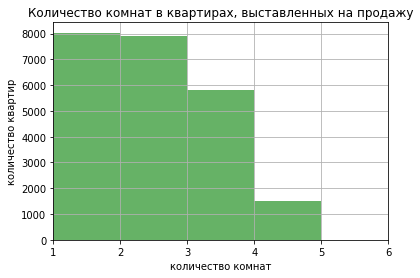

count    23258.000000
mean         2.046823
std          0.959605
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


In [21]:
good_rooms = data.query('0 < rooms < 6')
ax = plt.axes()
ax.set_title('Количество комнат в квартирах, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(good_rooms['rooms'], bins=4, color="green", alpha=0.6)
ax.set_xlim([1, 6]) 
plt.xlabel('количество комнат')
plt.ylabel('количество квартир') 
plt.show()

print(good_rooms['rooms'].describe()) 

Исключение выбросов на распределение практически не повлияло (убрали хвосты слева и справа, что и ожидалось), среднее и медиана остались на том же уровне.

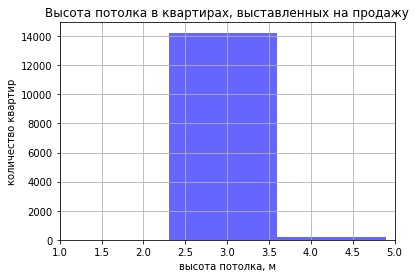

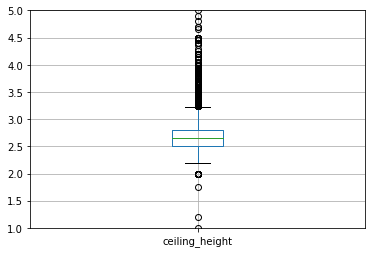

count    14490.000000
mean         2.729355
std          0.319691
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64


In [22]:
ax = plt.axes()
ax.set_title('Высота потолка в квартирах, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(data['ceiling_height'], bins=10, color="blue", alpha=0.6)
ax.set_xlim([1, 5]) 
plt.xlabel('высота потолка, м')
plt.ylabel('количество квартир') 
plt.show()

plt.ylim(1, 5)
data.boxplot(column='ceiling_height')
plt.show()
print(data['ceiling_height'].describe()) 

В основном в продаже квартиры с высотой потолков от 2,5 до 3.5 метров. Квартиры с потолками выше 3.5 метров - штучные предложения на рынке (могу предположить что это или дореволюционный фонд, или современные пентхаусы). 

Средняя высота потолков 2.77 метра, медиана - 2.65.
Высота больше 3.5 и меньше 2.3 - это выбросы.

Квартир с потолками менее 2.3 метра не строили (это даже для хрущевок минимум), потолки высотой более 3.5 метров - это или дореволюционный жилой фонд, или пентхаусы, или коттеджи.

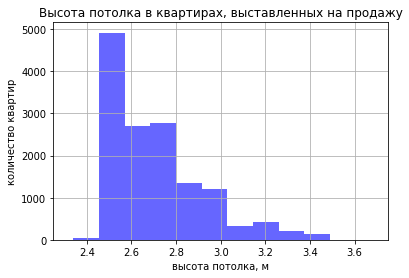

count    14058.000000
mean         2.697674
std          0.210332
min          2.340000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.490000
Name: ceiling_height, dtype: float64


In [23]:
good_ceilings = data.query('2.3 < ceiling_height < 3.5')
ax = plt.axes()
ax.set_title('Высота потолка в квартирах, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(good_ceilings['ceiling_height'], bins=10, color="blue", alpha=0.6)
ax.set_xlim([2.25, 3.75]) 
plt.xlabel('высота потолка, м')
plt.ylabel('количество квартир') 
plt.show()

print(good_ceilings['ceiling_height'].describe()) 

После исключения выбросов средняя высота (стала 2.69) потолков практически сравнялась с медианой, которая осталась на прежнем уровне (2.65 метра).

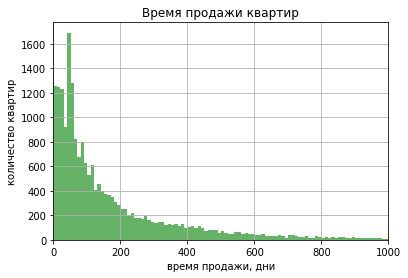

In [24]:
good_time = data.query('days_exposition < 2000') #исключаю маркеры пустых дней "99999"
ax = plt.axes()
ax.set_title('Время продажи квартир') 
ax.grid()
plt.Figure(figsize=(20,45))
plt.hist(good_time['days_exposition'], bins=158, color="green", alpha=0.6)
ax.set_xlim([0, 1000]) 
plt.xlabel('время продажи, дни')
plt.ylabel('количество квартир') 
plt.show()

Продажи основной массы квартир происходят в пределах одного года, пик продаж приходится на первые два месяца с подачи объявления. Отдельные квартиры продаются 2-3 года и более, скорее всего это нестандартные варианты.

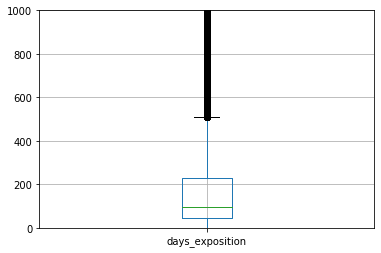

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64
1127
19877


In [25]:
plt.ylim(0, 1000)
good_time.boxplot(column='days_exposition')
plt.show()
print(good_time['days_exposition'].describe()) 
print(data[data['days_exposition'] < 10]['days_exposition'].count())
print(data[data['days_exposition'] < 800]['days_exposition'].count())

Медиана приходится на 95 дней, средний срок продажи квартиры составляет полгода. Судя по гистограмме недвижимость в Санкт-Петергбурге продается очень быстро, на продажи менее 10 дней приходится 5% всех продаж, но я предлагаю считать их считать очень быстрыми и отбросить (возможно объявление было размещено, а потом по какой-то причине снято). Медленные продажи, выпадающие за пределы "уса" - начиная с 500 дней и более, но я предлагаю отбрасывать значения начиная с 600 дней - нестандартная, премиальная недвижимость может продаваться годами.

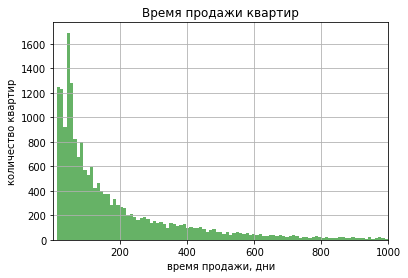

count    18938.000000
mean       177.807424
std        188.718831
min         11.000000
25%         46.000000
50%        104.000000
75%        236.000000
max        999.000000
Name: days_exposition, dtype: float64


In [26]:
good_sells = data.query('10 < days_exposition < 1000')
ax = plt.axes()
ax.set_title('Время продажи квартир') 
ax.grid()
plt.Figure(figsize=(20,45))
plt.hist(good_sells['days_exposition'], bins=100, color="green", alpha=0.6)
ax.set_xlim([1, 1000]) 
plt.xlabel('время продажи, дни')
plt.ylabel('количество квартир') 
plt.show()

print(good_sells['days_exposition'].describe())      

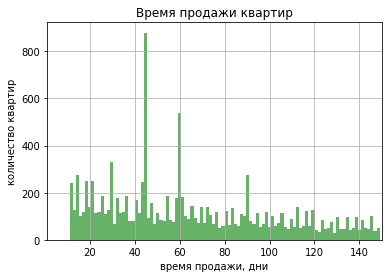

In [27]:
good_sells = data.query('10 < days_exposition < 150')
ax = plt.axes()
ax.set_title('Время продажи квартир') 
ax.grid()
plt.Figure(figsize=(20,45))
plt.hist(good_sells['days_exposition'], bins=100, color="green", alpha=0.6)
ax.set_xlim([1, 150]) 
plt.xlabel('время продажи, дни')
plt.ylabel('количество квартир') 
plt.show()

Есть пики приблизительно на 45 и 60 днях. У меня есть предположение, что это может быть оплаченный срок размещения объявления на разных сайтах, после которого объявление автоматически снимается, если не поступила оплата за следующий период. Возможно, не все продавцы самостоятельно снимают объявление, после получения аванса или выхода на сделку. Косвенно это предположние подтверждают небольшие пики на 30 и 90 днях.
Предлагаю ничего с этими данными не делать, так как они так или иначе отражают срок продажи квартиры, пусть и не совсем точно.

После исключения очень коротких и очень быстрых объявлений средний срок объявления практически не изменился (был 180 дней, стал 177), но изменилась медиана с 95 дней до 104.

В общем после исключения выбросов практически все гистограммы стали одного типа: пик, снижение вправо и длинный хвост.

In [28]:
print(good_prices.info()) #данные с очищенными от выбросов ценами

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22237 entries, 0 to 23697
Data columns (total 29 columns):
total_images            22237 non-null int64
last_price              22237 non-null int64
total_area              22237 non-null float64
first_day_exposition    22237 non-null datetime64[ns]
rooms                   22237 non-null int64
ceiling_height          13657 non-null float64
floors_total            22237 non-null int64
living_area             22125 non-null float64
floor                   22237 non-null int64
is_apartment            22237 non-null bool
studio                  22237 non-null bool
open_plan               22237 non-null bool
kitchen_area            22125 non-null float64
balcony                 22237 non-null int64
locality_name           22237 non-null object
airports_nearest        22237 non-null int64
cityCenters_nearest     22237 non-null int64
parks_around3000        22237 non-null int64
parks_nearest           22237 non-null int64
ponds_around3000     

Коэффициент зависимости цены квартиры от ее площади составляет 0.78


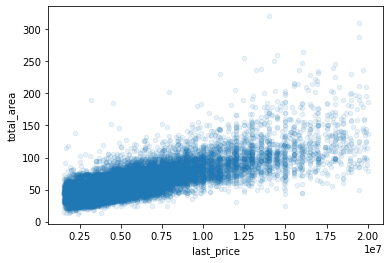

In [29]:
good_prices.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1) 
print('Коэффициент зависимости цены квартиры от ее площади составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['total_area'])))


Коэффициент зависимости цены квартиры от количества комнат составляет 0.52


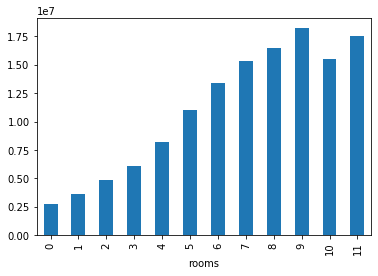

In [30]:
good_prices.groupby('rooms')['last_price'].median().plot(y='rooms', kind='bar')
print('Коэффициент зависимости цены квартиры от количества комнат составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['rooms'])))


Коэффициент зависимости цены квартиры от этажа составляет 0.06


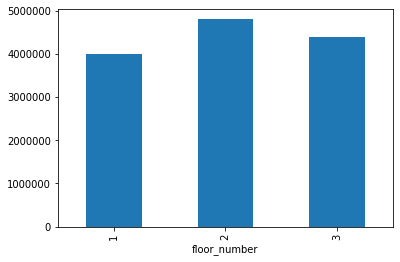

In [31]:
good_prices.groupby('floor_number')['last_price'].median().plot(y='floor_number', kind='bar')

print('Коэффициент зависимости цены квартиры от этажа составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['floor_number'])))


Коэффициент зависимости цены квартиры от дня недели размещения объявления составляет -0.01


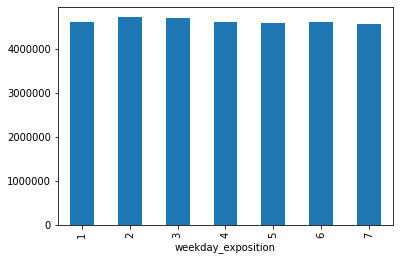

In [32]:
good_prices.groupby('weekday_exposition')['last_price'].median().plot(y='weekday_exposition', kind='bar')

print('Коэффициент зависимости цены квартиры от дня недели размещения объявления составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['weekday_exposition'])))


Коэффициент зависимости цены квартиры от месяца размещения объявления составляет 0.00


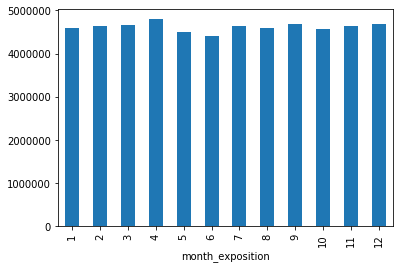

In [33]:
good_prices.groupby('month_exposition')['last_price'].median().plot(y='month_exposition', kind='bar')

print('Коэффициент зависимости цены квартиры от месяца размещения объявления составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['month_exposition'])))


Коэффициент зависимости цены квартиры от года размещения объявления составляет -0.02


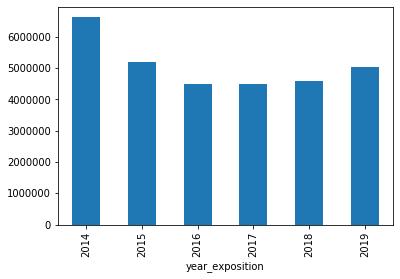

In [34]:
good_prices.groupby('year_exposition')['last_price'].median().plot(y='year_exposition', kind='bar')

print('Коэффициент зависимости цены квартиры от года размещения объявления составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['year_exposition'])))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Коэффициент зависимости цены квартиры от удаленности квартиры от центра составляет -0.44


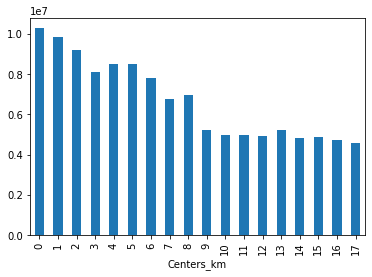

In [35]:
good_prices_near = good_prices.query('cityCenters_nearest < 17000') #до установки маркеров максимальное расстояние от центра не превышало 16028 метров, исключаю маркеры
good_prices_near['Centers_km'] = (good_prices_near['cityCenters_nearest'] / 1000).round().astype('int').copy()
good_prices_near.groupby('Centers_km')['last_price'].median().plot(y='cityCenters_nearest', kind='bar')

print('Коэффициент зависимости цены квартиры от удаленности квартиры от центра составляет {:.2f}'.format(good_prices['last_price'].corr(good_prices['cityCenters_nearest'])))

### Вывод

Цена квартиры напрямую зависит от ее площади, количества комнат.
Зависимость цены квартиры от этажа (первый, последний, другой) дня недели, месяца, года размещения объявления несущественная.
Если напрямую рассчитывать коэффициент зависимости цены квартиры от удаленности квартиры от центра, то зависимость получается обратная (как и должно быть) и не очень существенная, так как анализируем область в целом, а цена жилья в деревне в 30 километрах от города должна быть ниже, чем в райцентре в 100 километрах от города..

In [36]:
locality_max = data.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10)
#получила список из 10 населенных пунктов с самым болши количеством объявлений
print(locality_max)

locality_name
санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64


In [37]:
good_prices_local = good_prices.query('locality_name in @locality_max.index') #получила таблицу в части населенных пунктов с самым большим количеством объявлений
print(good_prices_local.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18453 entries, 0 to 23697
Data columns (total 29 columns):
total_images            18453 non-null int64
last_price              18453 non-null int64
total_area              18453 non-null float64
first_day_exposition    18453 non-null datetime64[ns]
rooms                   18453 non-null int64
ceiling_height          11331 non-null float64
floors_total            18453 non-null int64
living_area             18359 non-null float64
floor                   18453 non-null int64
is_apartment            18453 non-null bool
studio                  18453 non-null bool
open_plan               18453 non-null bool
kitchen_area            18359 non-null float64
balcony                 18453 non-null int64
locality_name           18453 non-null object
airports_nearest        18453 non-null int64
cityCenters_nearest     18453 non-null int64
parks_around3000        18453 non-null int64
parks_nearest           18453 non-null int64
ponds_around3000     

In [38]:
#print(good_prices_local['price_per_meter'].describe()) 
price_per_meter_local = good_prices_local.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'mean')
print(price_per_meter_local.sort_values(by = 'price_per_meter', ascending = False))
#посчитала среднюю цену за квадратный метр для населенных пунктов с самым большим количеством объявлений

                 price_per_meter
locality_name                   
санкт-петербург    108624.976771
пушкин             101788.572053
кудрово             95324.930544
парголово           90273.590084
мурино              86087.512050
шушары              78655.592167
колпино             75333.295801
гатчина             69536.314687
всеволожск          67514.045319
выборг              59479.344610


Самая высокая средняя цена за квадратный метр - в Санкт-Петербурге и Пушкине - 108624 рубля и 101788 рублей за квадратный метр соответственно.
Самая низкая  - во Всеволожске и Выборге - 67514 рублей и 59479 рублей за квадратный метр соответственно.
Пушкин находится в границах Санкт-Петербурга, цены на недвижимость в нем этому соответствуют. Кудрово и Мурино расположены вблизи трансопортного кольца, должно быть удобно добираться на работу и с работы в Санкт-Петербурге. Цены на недвижимость в Выборге обусловлены его удаленностью от Санкт-Петербурга. Почему недвижимость во Всеволожске дешевле, чем недвижимость в Гатчине - возможно во Всеволожске старые дома и не очень удобная транспортная связка с центром.

In [39]:
city = 'санкт-петербург'
good_prices_SPb = good_prices.query('locality_name in @city') #получила срез по Санкт-Петербургу
print(good_prices_SPb.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 23697
Data columns (total 29 columns):
total_images            15012 non-null int64
last_price              15012 non-null int64
total_area              15012 non-null float64
first_day_exposition    15012 non-null datetime64[ns]
rooms                   15012 non-null int64
ceiling_height          9615 non-null float64
floors_total            15012 non-null int64
living_area             14940 non-null float64
floor                   15012 non-null int64
is_apartment            15012 non-null bool
studio                  15012 non-null bool
open_plan               15012 non-null bool
kitchen_area            14940 non-null float64
balcony                 15012 non-null int64
locality_name           15012 non-null object
airports_nearest        15012 non-null int64
cityCenters_nearest     15012 non-null int64
parks_around3000        15012 non-null int64
parks_nearest           15012 non-null int64
ponds_around3000      

In [40]:
good_prices_SPb['cityCenters_km'] = (good_prices_SPb['cityCenters_nearest'] / 1000).round().astype('int').copy()
#print(good_prices_SPb.info())
#добавила столбец с расстоянием до центра в километрах
display(good_prices_SPb.head(10))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,price_per_meter,floor_number,living_area_rate,kitchen_area_rate,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755,99999,4,3,2019,120370.370370,2,0.472222,0.527778,16
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,574,558,4,8,2015,92785.714286,2,0.612500,0.387500,14
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48,121,2,6,2018,100000.000000,2,0.320000,0.680000,8
7,5,7915000,71.6,2019-04-18,2,NaN,24,44.3,22,True,...,0,99999,4,4,2019,110544.692737,2,0.618715,0.381285,12
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,0,289,7,2,2017,88524.590164,2,0.714754,0.285246,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,553,137,4,11,2017,127525.252525,2,0.512626,0.487374,14
15,16,4650000,39.0,2017-11-18,1,NaN,14,20.5,5,True,...,296,19,6,11,2017,119230.769231,2,0.525641,0.474359,14
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,0,397,4,11,2017,81707.317073,1,0.678049,0.321951,11
17,6,4180000,36.0,2016-09-09,1,NaN,17,16.5,7,True,...,859,571,5,9,2016,116111.111111,2,0.458333,0.541667,15
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,True,...,0,168,5,1,2017,104838.709677,2,0.625806,0.374194,11


                price_per_meter  cityCenters_km
cityCenters_km                                 
0                 118153.215310               0
1                 129643.925472               1
2                 122138.107993               2
3                 112994.403271               3
4                 120668.307919               4
5                 125342.390243               5
6                 126724.902726               6
7                 123837.738523               7
8                 121442.994158               8
9                 110442.247045               9
10                111223.571123              10
11                107335.852335              11
12                107657.419322              12
13                107688.318077              13
14                104202.834723              14
15                103912.724766              15
16                100178.231402              16
17                 96309.492256              17
18                 96308.935932         

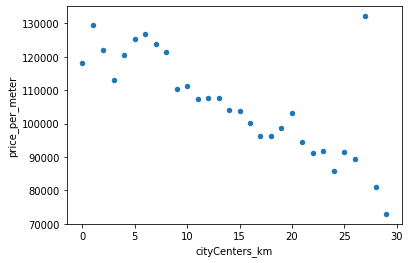

In [41]:
priceSPb_per_km = good_prices_SPb.pivot_table(index='cityCenters_km', values='price_per_meter')
#посчитала среднюю стоимость квадратного метра для каждого километра удаления от центра в Санкт-Петербурге
priceSPb_per_km['cityCenters_km'] = priceSPb_per_km.index
print(priceSPb_per_km)
priceSPb_per_km.plot(x='cityCenters_km', y='price_per_meter', kind='scatter') #построила график зависимости цены от удаления от центра

Исходя из графика видно, что начиная с девятого километра от центра средняя цена за квадратный метр снижается, то есть центральными можно считать районы в радиусе 8 километров.

Есть небольшое повышение цены на 20 километре (возможно какой-то новый район со всеми удобствами) и на 27 километре - но это скорее всего уже коттеджи на краю города и природы искажают цены.

In [42]:
good_prices_SPb_centre = good_prices_SPb.query('cityCenters_km <= 8') # выделила объявления о продаже в центральных районах города
#display(good_prices_SPb_centre.info())

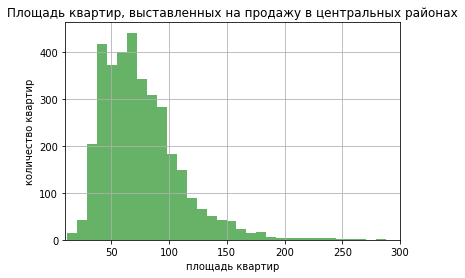

count    3534.000000
mean       75.808902
std        33.584727
min        12.000000
25%        51.000000
50%        70.000000
75%        93.000000
max       287.500000
Name: total_area, dtype: float64


In [43]:
ax = plt.axes()
ax.set_title('Площадь квартир, выставленных на продажу в центральных районах') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(good_prices_SPb_centre['total_area'], bins=32, color="green", alpha=0.6)
ax.set_xlim([10, 300]) 
plt.xlabel('площадь квартир')
plt.ylabel('количество квартир') 
plt.show()

print(good_prices_SPb_centre['total_area'].describe()) 

Наибольшее количество квартир выставленных на продажу в центральных районах города - с площадью 40 и 70-80 квадратных метров, медиана для центральных районов составляет 70 квадратных метров, среднее - 75 квадратных метров.

count    3.534000e+03
mean     8.944335e+06
std      3.824588e+06
min      1.600000e+06
25%      6.084592e+06
50%      8.163000e+06
75%      1.120000e+07
max      1.999900e+07
Name: last_price, dtype: float64


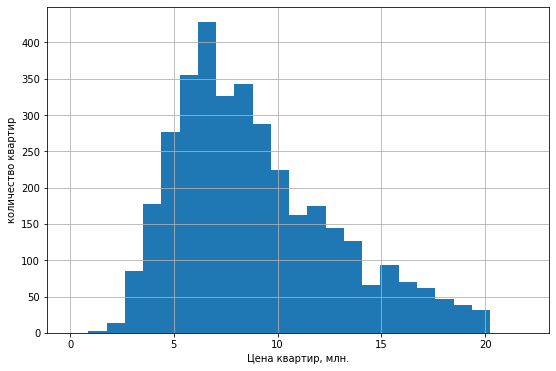

In [44]:
(good_prices_SPb_centre['last_price'] / 1000000).hist(bins=25, range=(0, 22), figsize=(9, 6))
plt.xlabel('Цена квартир, млн.')
plt.ylabel('количество квартир')
ax.set_title('Цена квартир, выставленных на продажу') 

print(good_prices_SPb_centre['last_price'].describe()) 
 

Средняя цена квартиры в центральных районах города - 8.94 миллиона, медианная - 8.16 миллионов.

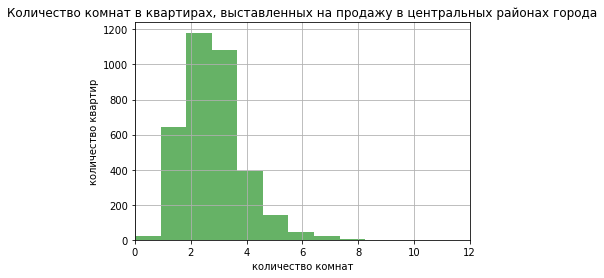

count    3534.000000
mean        2.546406
std         1.208973
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64


In [45]:
ax = plt.axes()
ax.set_title('Количество комнат в квартирах, выставленных на продажу в центральных районах города') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(good_prices_SPb_centre['rooms'], bins=12, color="green", alpha=0.6)
ax.set_xlim([0, 12]) 
plt.xlabel('количество комнат')
plt.ylabel('количество квартир') 
plt.show()

print(good_prices_SPb_centre['rooms'].describe()) 

В центральных районах города картина средняя и медиана - 2 комнаты, но при этом на продажу выставляется еще достаточное количество 3-х и 4-х комнатных квартир, а также отдельные люксовые предложения с большим количеством комнат.

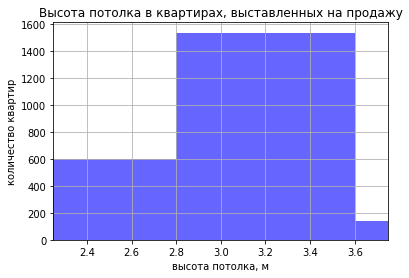

count    2281.000000
mean        3.028005
std         0.382380
min         2.000000
25%         2.750000
50%         3.000000
75%         3.200000
max        10.000000
Name: ceiling_height, dtype: float64


In [46]:
ax = plt.axes()
ax.set_title('Высота потолка в квартирах, выставленных на продажу') 
ax.grid()
plt.Figure(figsize=(15,15))
plt.hist(good_prices_SPb_centre['ceiling_height'], bins=10, color="blue", alpha=0.6)
ax.set_xlim([2.25, 3.75]) 
plt.xlabel('высота потолка, м')
plt.ylabel('количество квартир') 
plt.show()

print(good_prices_SPb_centre['ceiling_height'].describe())

В центральных районах города продаваемые квартиры выше - средняя высота 3.02 метра, медиана - 3 метра, это может объясняться тем, что меньше типовых домов советской постройки (хрущевок, брежневок), в которых потолки не превышают 2.65 метра.

Коэффициент зависимости цены квартиры в центральном районе от количества комнат составляет 0.52


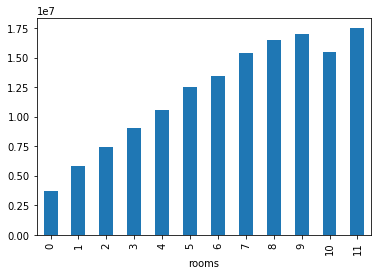

In [47]:
good_prices_SPb_centre.groupby('rooms')['last_price'].median().plot(y='rooms', kind='bar')

print('Коэффициент зависимости цены квартиры в центральном районе от количества комнат составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['rooms'])))


Коэффициент зависимости цены квартиры в центральном районе от этажа составляет 0.12


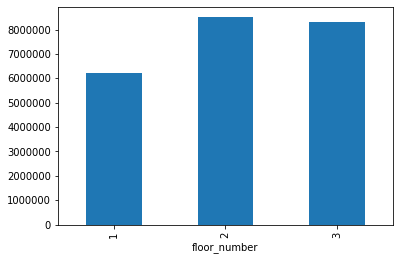

In [48]:
good_prices_SPb_centre.groupby('floor_number')['last_price'].median().plot(y='floor_number', kind='bar')

print('Коэффициент зависимости цены квартиры в центральном районе от этажа составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['floor_number'])))


Коэффициент зависимости цены квартиры в центральном районе от удаленности от центра составляет -0.18


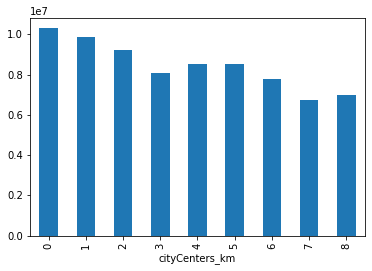

In [49]:
good_prices_SPb_centre.groupby('cityCenters_km')['last_price'].median().plot(y='cityCenters_km', kind='bar')

print('Коэффициент зависимости цены квартиры в центральном районе от удаленности от центра составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['cityCenters_km'])))


Коэффициент зависимости цены квартиры в центральном районе от дня недели размещения объявления составляет -0.01


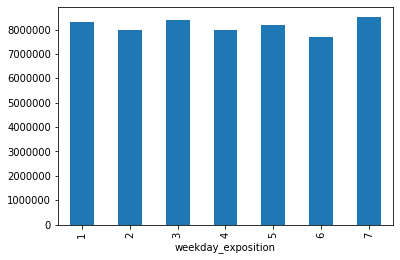

In [50]:
good_prices_SPb_centre.groupby('weekday_exposition')['last_price'].median().plot(y='weekday_exposition', kind='bar')
 
print('Коэффициент зависимости цены квартиры в центральном районе от дня недели размещения объявления составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['weekday_exposition'])))


Коэффициент зависимости цены квартиры в центральном районе от месяца размещения объявления составляет -0.03


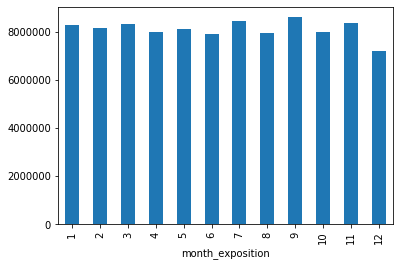

In [51]:
good_prices_SPb_centre.groupby('month_exposition')['last_price'].median().plot(y='month_exposition', kind='bar')

print('Коэффициент зависимости цены квартиры в центральном районе от месяца размещения объявления составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['month_exposition'])))


Коэффициент зависимости цены квартиры в центральном районе от года размещения объявления составляет -0.03


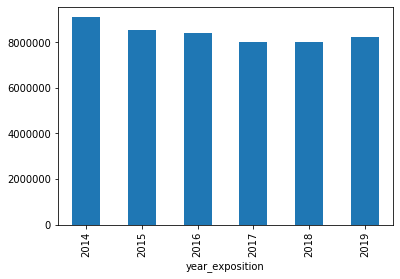

In [52]:
good_prices_SPb_centre.groupby('year_exposition')['last_price'].median().plot(y='year_exposition', kind='bar')

print('Коэффициент зависимости цены квартиры в центральном районе от года размещения объявления составляет {:.2f}'.format(good_prices_SPb_centre['last_price'].corr(good_prices_SPb_centre['year_exposition'])))

### Вывод

Наибольшее количество квартир выставленных на продажу по области в целом - квартиры с площадью 30-40 квадратных метров, на них приходится почти половина всех продаваемых квартир. Медиана составляет 52 квадратных метра, средняя площадь - 57 квадратных метров.
Наибольшее количество квартир выставленных на продажу в центральных районах города - с площадью 40 и 70-80 квадратных метров, медиана для центральных районов составляет 70 квадратных метров.

Средняя цена квартиры по области в целом составляет 5.54 миллионов, медианная - 4.64 миллиона. 
Средняя цена квартиры в центральных районах города - 8.94 миллиона, медианная - 8.16 миллионов.
Цена квартиры в центре города выше, что вполне ожидаемо и логично.

В целом по области на продажу выставлены одно- и двухкомнатные квартиры (почти 70%), чуть менее 25% рынка занимают трехкомнатные квартиры. В данном случае среднее совпадает с медианой - 2 комнаты.
В центральных районах города картина практически такая же, средняя и медина - 2 комнаты.

В среднем по области в продаже квартиры с высотой потолков от 2,5 до 3.5 метров. Квартиры с потолками выше 3.5 метров - штучные предложения на рынке (могу предположить что это или дореволюционный фонд, или современные пентхаусы). Средняя высота потолков 2.69 метра, медиана - 2.65.
В центральных районах города продаваемые квартиры выше - средняя высота 3.02 метра, медиана - 3.20 метров, это может объясняться тем, что меньше типовых домов советской постройки (хрущевок, брежневок), в которых потолки не превышают 2.65 метра.

Цена квартиры напрямую зависит от ее площади, количества комнат, это утверждение справедливо как для центральных районов города, так и для области в целом.
Зависимость цены квартиры от этажа (первый, последний, другой) дня недели, месяца, года размещения объявления несущественная, что также одинаково справедливо для центра города и для области в целом.
Зависимость цены квартиры от удаленности квартиры от центра обратная и не очень существенная, так как разброс цен в центральных районах города не очень большой.


## Общий вывод

Основной объем составляют объявления о продаже одно-двухкомнатных квартир, площадью 30-40 квадратных метров. Квартиры площадью более 150 квадратных метров и с количеством комнат более 4-х - это редкие варианты.
В среднем по области в продаже квартиры с высотой потолков от 2,5 до 3.5 метров. Квартиры с потолками выше 3.5 метров - штучные предложения на рынке. В центральных районах города продаваемые квартиры выше - средняя высота 3.02 метра, медиана - 3.20 метров.
Цена квартиры напрямую зависит от ее площади, количества комнат.
Этаж и дата размещения объявления на стоимость квартиры влияния не оказывают.
Закономерность "чем ближе к центру - тем дороже" работает как для средних по области, так и для Санкт-Петербурга, только в центральных районах города эта зависимость не очень ярко выражена.


In [53]:
parametre = pd.DataFrame({'параметр': ['площадь', 'количество комнат', 'этаж', 'день подачи объявления', 'удаленность от центра'], 'влияние на цену': ['существенное', 'не существенное', 'не существенное', 'не существенное', 'существенное, в пределах населенного пункта']})
display(parametre)

,параметр,влияние на цену
0,площадь,существенное
1,количество комнат,не существенное
2,этаж,не существенное
3,день подачи объявления,не существенное
4,удаленность от центра,"существенное, в пределах населенного пункта"
